## ML - Task 3 - Data Preprocessing

**Objective:**
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

**Dataset:** 
[Dataset for Data preprocessing](link_to_dataset)

**Key Components to be fulfilled:**

1. **Data Exploration:**
   - Explore the data, list down the unique values in each feature and find its length. 
   - Perform the statistical analysis and renaming of the columns.

2. **Data Cleaning:**
   - Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
   - Replace the value 0 in age as NaN
   - Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

3. **Data Analysis:**
   - Filter the data with age > 40 and salary < 5000
   - Plot the chart with age and salary
   - Count the number of people from each place and represent it visually

4. **Data Encoding:**
   - Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

5. **Feature Scaling:**
   - After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler

# Read Data

In [3]:
df = pd.read_csv('Employee.csv')
df1 = df.copy()
df1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Exploration

In [4]:
df1.shape

(148, 6)

In [5]:
df1.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
df1.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [8]:
df1.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [9]:
df1.duplicated().sum()

4

In [10]:
for col in df1.columns:
    print(f"Unique values in {col}")
    print(df1[col].unique())
    print('Length :',len(df1[col].unique()))
    print('===================================')

Unique values in Company
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length : 7
Unique values in Age
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length : 30
Unique values in Salary
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length : 41
Unique values in Place
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length : 12
Unique values in Country
['India']
Length : 1
Unique values in Gender
[0 1]
Length : 2


In [11]:
df1.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [12]:
df1.describe(include='object')

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [13]:
pd.crosstab(df1['Company'],df1['Place'],margins=True)

Place,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune,All
Company,,,,,,,,,,,,
CTS,0,7,3,4,2,3,9,0,1,2,2,33
Congnizant,0,0,0,0,0,0,1,0,1,0,0,2
Infosys,1,11,3,5,6,3,11,0,1,1,0,42
Infosys Pvt Lmt,0,0,1,0,0,0,1,0,0,0,0,2
TCS,0,13,6,4,5,1,13,1,4,0,0,47
Tata Consultancy Services,0,0,0,0,0,0,1,0,0,0,0,1
All,1,31,13,13,13,7,36,1,7,3,2,127


In [14]:
num_col = df1.select_dtypes(include=['number']).columns
print('numerical columns:',num_col)
obj_col = df1.select_dtypes(include=['object']).columns
print('categorical columns:',obj_col)

numerical columns: Index(['Age', 'Salary', 'Gender'], dtype='object')
categorical columns: Index(['Company', 'Place', 'Country'], dtype='object')


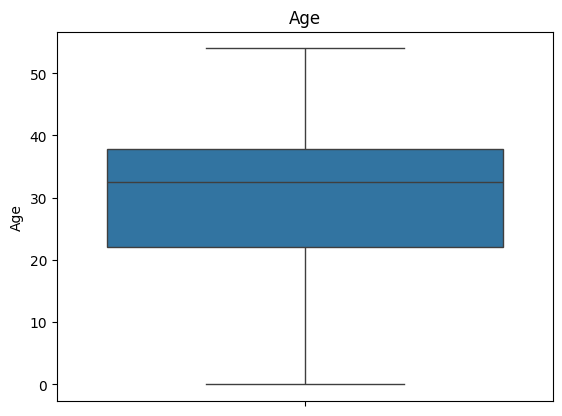

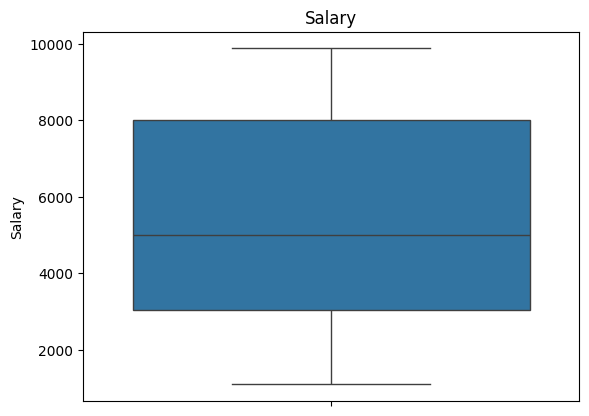

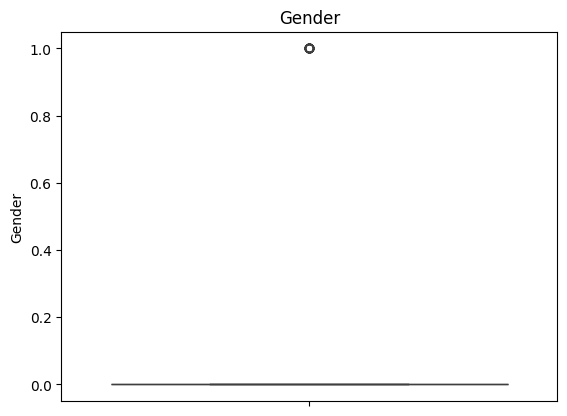

In [16]:
for col in num_col:
    sns.boxplot(df1[col])
    plt.title(col)
    plt.show()

# Data Cleaning

In [17]:
df1 = df1.drop(columns='Country')
df1

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,0
1,Infosys,30.0,NaN,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0
...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,1
144,Infosys,22.0,8787.0,Calcutta,1
145,Infosys,44.0,4034.0,Delhi,1
146,TCS,33.0,5034.0,Mumbai,1


In [18]:
df1 = df1.drop_duplicates()

In [19]:
df1.shape

(144, 5)

In [20]:
df1['Age'].isnull().sum()

17

In [22]:
df1['Age'].replace(0,np.nan)
df1['Age'].isnull().sum()

23

In [25]:
replace_dict_comp = {'Tata Consultancy Services':'TCS','Infosys Pvt Lmt':'Infosys','Congnizant':'CTS'}
df1['Company'].replace(replace_dict_comp,inplace=True)

C:\Users\jsnan\AppData\Local\Temp\ipykernel_11520\3716057439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Company'].replace(replace_dict_comp,inplace=True)


In [26]:
df1['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [28]:
obj_col = df1.select_dtypes(include=['object']).columns
df1[obj_col].isnull().sum()

Company     8
Place      14
dtype: int64

In [30]:
for col in obj_col:
    mode_val = df1[col].mode()[0]
    df1.loc[df1[col].isnull(), col] = mode_val

In [31]:
df1[obj_col].isnull().sum()

Company    0
Place      0
dtype: int64

In [33]:
num_col = df1.select_dtypes(include='float64').columns
num_col
df1[num_col].isnull().sum()

Age       23
Salary    23
dtype: int64

In [34]:
for col in num_col:
    mean_val = abs(int(np.mean(df1[col])))
    df1.loc[df1[col].isnull(), col] = mean_val

In [35]:
df1[num_col].isnull().sum()

Age       0
Salary    0
dtype: int64

In [36]:
df1.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

# Data Analysis

In [37]:
age_sal_filter = df1[(df1['Age']>40) & (df1['Salary']<5000)]
age_sal_filter

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


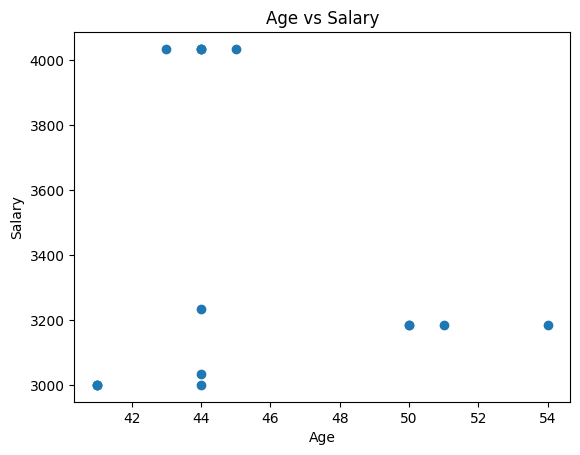

In [38]:
plt.scatter(age_sal_filter['Age'], age_sal_filter['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

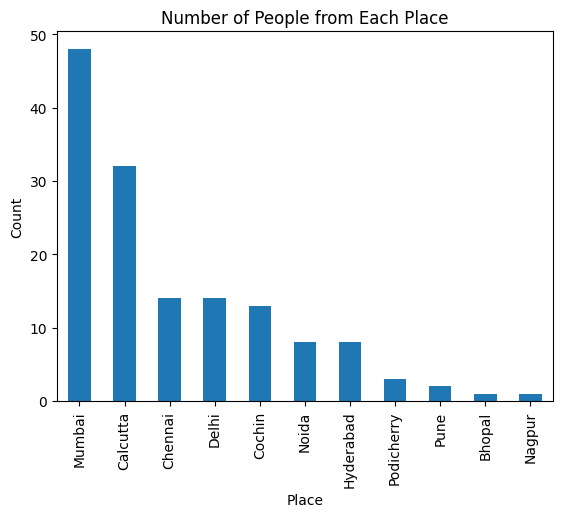

In [39]:
place_counts = df1['Place'].value_counts()
place_counts.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.show()

# Data Encoding

In [41]:
df_one_hot_encoded = pd.get_dummies(data=df1,columns=['Company','Place'])
df_one_hot_encoded

,Age,Salary,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5283.0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.0,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.0,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.0,1,False,False,True,False,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.0,1,False,True,False,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.0,1,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [42]:
df_label_encoded=df1
columns_to_encode = ['Company','Place']
label_encoders={}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df_label_encoded[column + '_encoded'] = label_encoders[column].fit_transform(df_label_encoded[column])

C:\Users\jsnan\AppData\Local\Temp\ipykernel_11520\4197415907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_encoded[column + '_encoded'] = label_encoders[column].fit_transform(df_label_encoded[column])
C:\Users\jsnan\AppData\Local\Temp\ipykernel_11520\4197415907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_encoded[column + '_encoded'] = label_encoders[column].fit_transform(df_label_encoded[column])


In [43]:
df_label_encoded

,Company,Age,Salary,Place,Gender,Company_encoded,Place_encoded
0,TCS,20.0,5283.0,Chennai,0,2,2
1,Infosys,30.0,5283.0,Mumbai,0,1,6
2,TCS,35.0,2300.0,Calcutta,0,2,1
3,Infosys,40.0,3000.0,Delhi,0,1,4
4,TCS,23.0,4000.0,Mumbai,0,2,6
...,...,...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,0,1,6
143,TCS,33.0,9024.0,Calcutta,1,2,1
145,Infosys,44.0,4034.0,Delhi,1,1,4
146,TCS,33.0,5034.0,Mumbai,1,2,6


In [44]:
df_label_encoded=df_label_encoded.drop(columns = ['Place','Company'])
df_label_encoded

,Age,Salary,Gender,Company_encoded,Place_encoded
0,20.0,5283.0,0,2,2
1,30.0,5283.0,0,1,6
2,35.0,2300.0,0,2,1
3,40.0,3000.0,0,1,4
4,23.0,4000.0,0,2,6
...,...,...,...,...,...
142,22.0,8202.0,0,1,6
143,33.0,9024.0,1,2,1
145,44.0,4034.0,1,1,4
146,33.0,5034.0,1,2,6


# Feature Scaling

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(df_one_hot_encoded)

StandardScaler()

In [47]:
scaled_data = scaler.transform(df_one_hot_encoded)
print(scaled_data)

[[-1.46656902e+00 -1.67718000e-04 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [-2.47954254e-01 -1.67718000e-04 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [ 3.61353128e-01 -1.26409057e+00 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 ...
 [ 1.45810642e+00 -5.29379800e-01  1.87082869e+00 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [ 1.17630175e-01 -1.05671167e-01  1.87082869e+00 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [-1.22284607e+00  1.23663778e+00 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]]


In [48]:
scaler = MinMaxScaler()

In [49]:
scaler.fit(df_label_encoded)

MinMaxScaler()

In [50]:
scaled_data1 = scaler.transform(df_label_encoded)

In [51]:
print(scaled_data1)

[[0.08108108 0.47729601 0.         1.         0.2       ]
 [0.35135135 0.47729601 0.         0.5        0.6       ]
 [0.48648649 0.13781723 0.         1.         0.1       ]
 [0.62162162 0.21748037 0.         0.5        0.4       ]
 [0.16216216 0.33128485 0.         1.         0.6       ]
 [0.40540541 0.44508934 0.         0.5        0.1       ]
 [0.40540541 0.55889382 1.         1.         0.2       ]
 [0.16216216 0.6726983  1.         0.5        0.6       ]
 [0.45945946 0.78650279 1.         1.         0.1       ]
 [0.75675676 0.90030727 0.         0.         0.4       ]
 [0.16216216 0.47729601 0.         0.         0.6       ]
 [0.45945946 0.         0.         0.         0.1       ]
 [0.75675676 0.47729601 0.         0.         0.2       ]
 [0.02702703 0.01650165 0.         0.         0.6       ]
 [0.62162162 0.21748037 0.         0.5        0.1       ]
 [0.16216216 0.21748037 0.         1.         0.4       ]
 [0.16216216 0.2208945  0.         0.5        0.9       ]
 [0.45945946 0